# Analisis de datos Titanic

Este conjunto de datos contiene informacion sobre el numero de supervivientes 

In [72]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from missingno import matrix
import missingno as msno

In [73]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
df = titanic.copy()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [76]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df.describe(include= 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [79]:
# Número de filas duplicadas
df.duplicated().sum()

np.int64(107)

In [80]:
df[df.duplicated(keep=False)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


embark_town y embarked son lo mismo
alive y survived es lo mismo 
pclass y class es lo mismo
CONCLUSIÓN: borrar una de cada

In [81]:
# Elimino embarked
df= df.drop('embarked', axis=1)

In [82]:
df= df.drop('class', axis=1)

In [83]:
df= df.drop('alive', axis=1)

In [89]:
# Así se hace todo en una misma fila
df.drop(columns=['embarked','class','alive'], inplace=True)

KeyError: "['embarked', 'class', 'alive'] not found in axis"

In [90]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
886,0,2,male,27.0,0,0,13.00,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.00,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.45,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.00,man,True,C,Cherbourg,True
890,0,3,male,32.0,0,0,7.75,man,True,NaN,Queenstown,True


In [91]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
5,0,3,male,NaN,0,0,8.4583,man,True,NaN,Queenstown,True
17,1,2,male,NaN,0,0,13.0000,man,True,NaN,Southampton,True
19,1,3,female,NaN,0,0,7.2250,woman,False,NaN,Cherbourg,True
26,0,3,male,NaN,0,0,7.2250,man,True,NaN,Cherbourg,True
28,1,3,female,NaN,0,0,7.8792,woman,False,NaN,Queenstown,True
...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,man,True,NaN,Cherbourg,True
863,0,3,female,NaN,8,2,69.5500,woman,False,NaN,Southampton,False
868,0,3,male,NaN,0,0,9.5000,man,True,NaN,Southampton,True
878,0,3,male,NaN,0,0,7.8958,man,True,NaN,Southampton,True


In [100]:
numeric_cols = df.select_dtypes(exclude = 'object')
numeric_cols

,survived,pclass,age,sibsp,parch,fare,adult_male,deck,alone
0,0,3,22.0,1,0,7.2500,True,NaN,False
1,1,1,38.0,1,0,71.2833,False,C,False
2,1,3,26.0,0,0,7.9250,False,NaN,True
3,1,1,35.0,1,0,53.1000,False,C,False
4,0,3,35.0,0,0,8.0500,True,NaN,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,NaN,True
887,1,1,19.0,0,0,30.0000,False,B,True
888,0,3,NaN,1,2,23.4500,False,NaN,False
889,1,1,26.0,0,0,30.0000,True,C,True


In [93]:
df1 = df.copy()
df1 =df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   who          182 non-null    object  
 8   adult_male   182 non-null    bool    
 9   deck         182 non-null    category
 10  embark_town  182 non-null    object  
 11  alone        182 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 15.1+ KB


In [94]:
df['survived'].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

### Nulos

In [95]:
nulos = pd.DataFrame(df.isnull().sum(), columns=['Conteo de nulos'])
nulos['porcentaje'] = (nulos['Conteo de nulos']/ len(df))*100
nulos

,Conteo de nulos,porcentaje
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
who,0,0.000000
adult_male,0,0.000000
deck,688,77.216611


In [101]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,C,Cherbourg,True


In [105]:
# se pueden reemplazar datos
df['alive'] = df['alive'].replace({'no':0, 'yes':1})

KeyError: 'alive'

In [97]:
# Muestrame solo las columnas numericas
df.select_dtypes(include = 'number').columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
# Estadísticas descriptivas
print(df[])
#Histogramas
df['age'].plot(kind='hist')
# Boxplots
df[['age']]
# Pruebas de normalidad para 'age'
edad_sin_na = 

In [ ]:
# HECERLO CON TODAS LAS VARIABLES CATEGÓRICAS
# Frecuencias absolutas y relativas


In [ ]:
# Matriz de correlación


La edad de la persona no esta relacionada con el dinero que pago por el billete, por eso no se pueden imputar

In [ ]:
# Tabla de contingencia entre sex y survived
tabla_cont= pd.crosstab(df['sex'], df['survived'])
print(tabla_cont)

# Test chi-cuadrado
chi2, p, dof, excepted = stats.chi

In [ ]:
# Test de contingencia

<Figure size 1000x600 with 0 Axes>

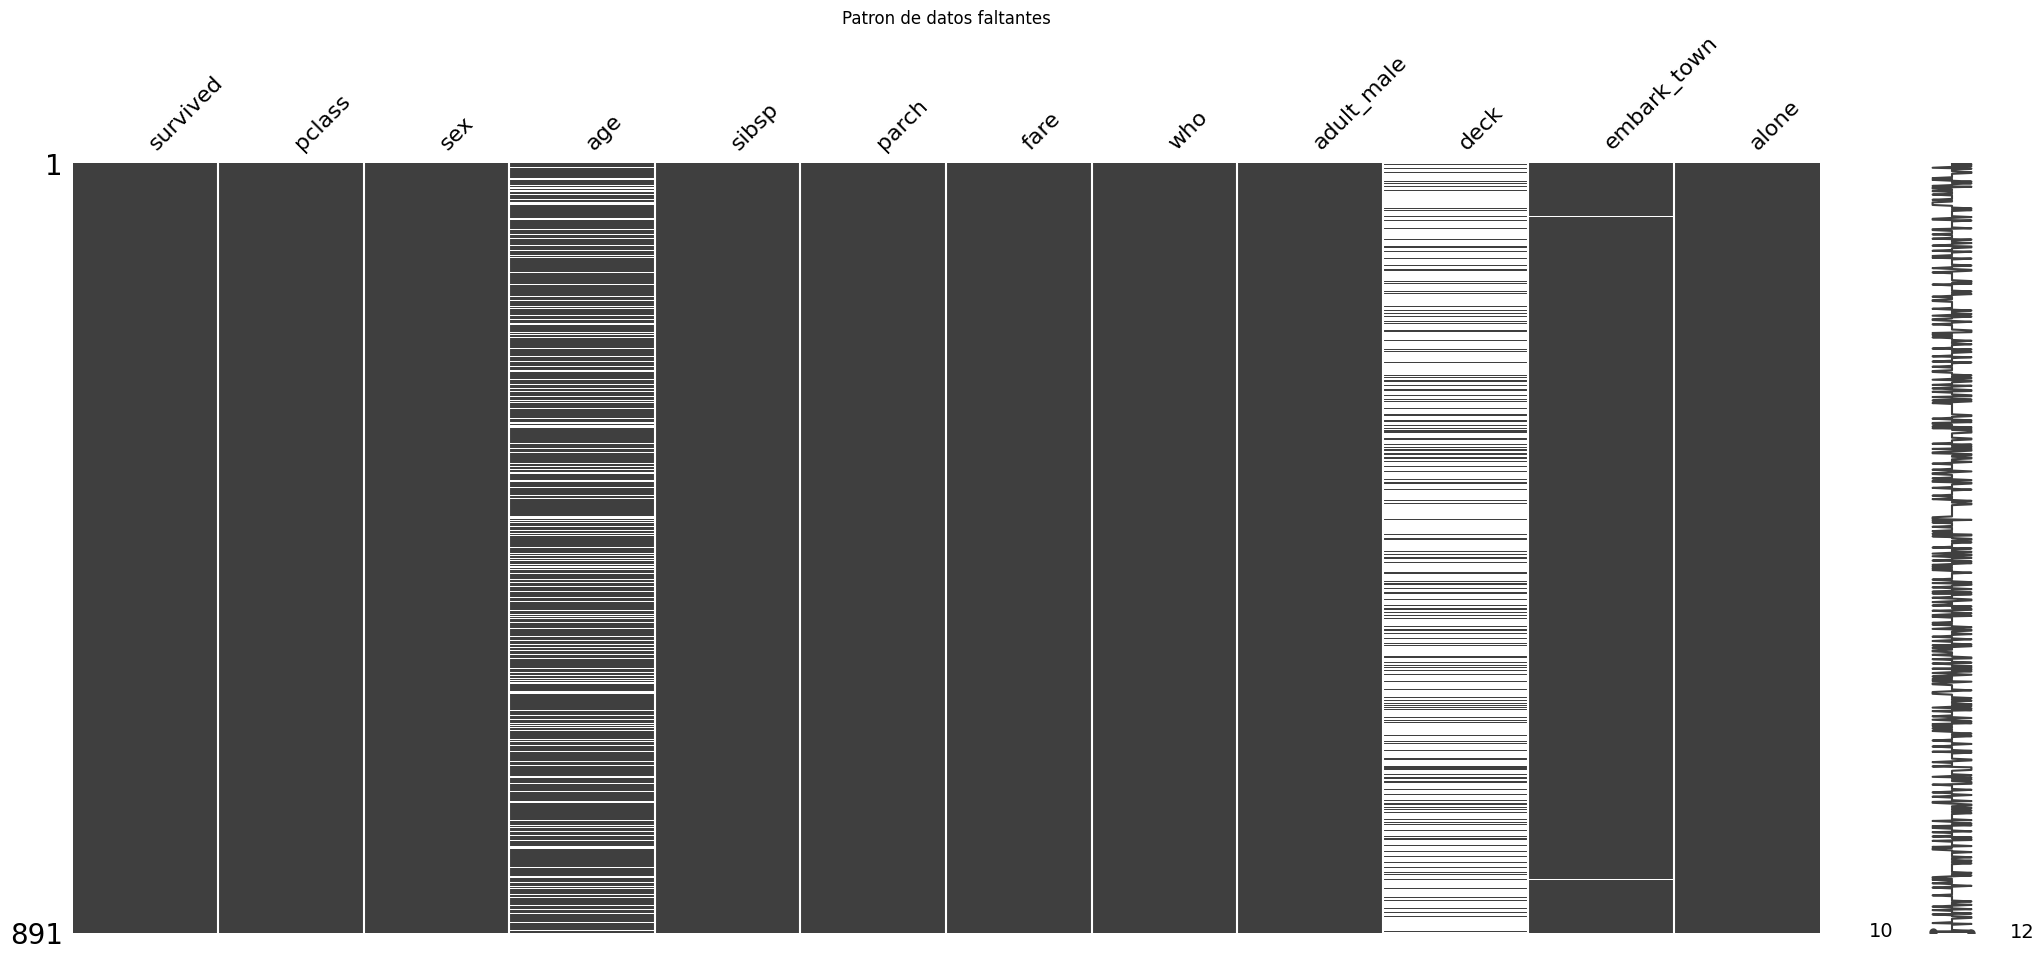

In [98]:
plt.figure(figsize=(10,6))
msno.matrix(df)
plt.title('Patron de datos faltantes')
plt.show();

<Figure size 1000x600 with 0 Axes>

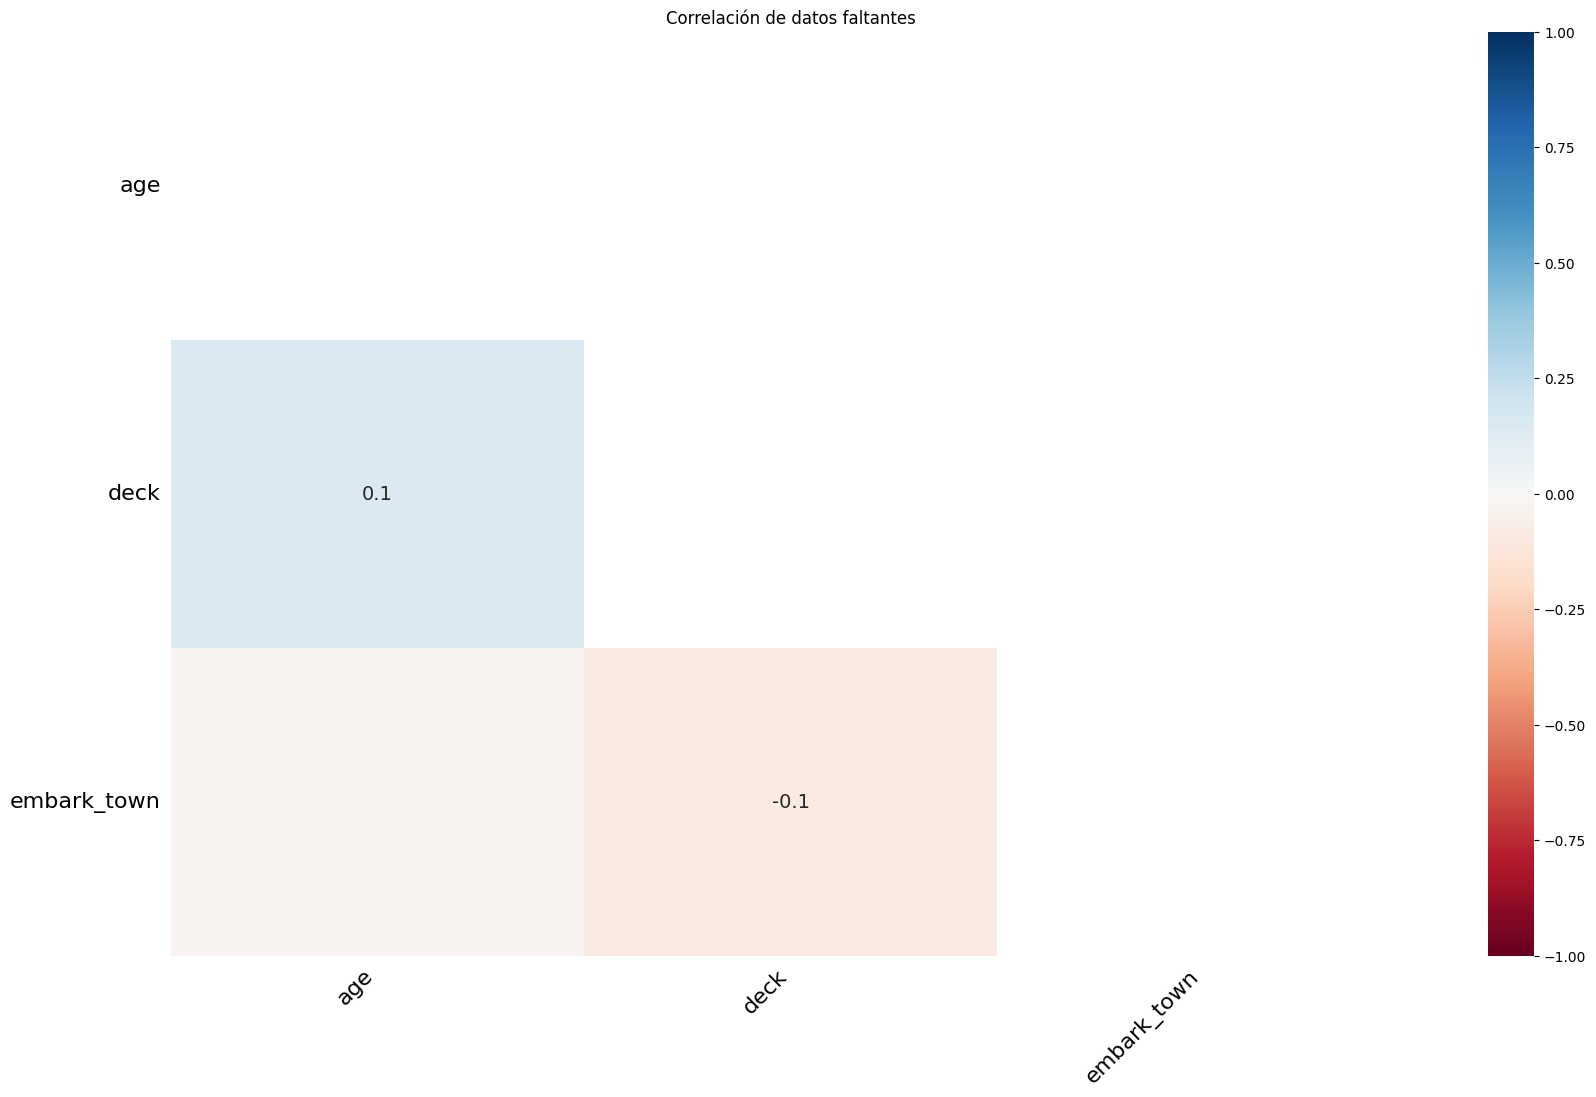

In [99]:
plt.figure(figsize=(10,6))
msno.heatmap(df)
plt.title('Correlación de datos faltantes')
plt.show();

In [106]:
# Análisis de datos faltantes
print('Análisis de age')
#print('\nMedia con datos')
print('Media de datos con missing', df['age'].mean())
print('Media con datos faltantes:',
      df['age'].dropna().mean())
#np.nanmean(df['body_mass_g']) # Se puede hacer así también

Análisis de age
Media de datos con missing 29.69911764705882
Media con datos faltantes: 29.69911764705882


In [113]:
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,C,Cherbourg,True


In [115]:
col = 'embark_town'

if col == 'embark_town':
    df[col].fillna('NO TIENE', inplace=True)

df[col].describe(include= 'object')
sns.barplot(data=df.groupby(col).count()[['embark_town']].T)
plt.xticks(rotation=45);

C:\Users\nuria\AppData\Local\Temp\ipykernel_21456\4022713858.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NO TIENE', inplace=True)


KeyError: "None of [Index(['embark_town'], dtype='object')] are in the [columns]"